### Orthogonal Distance Regression (ODR) Fitting Method

Advanced data fitting method that is used when both the dependent and independent variables have uncertainties. It's fully implemented in *scipy.odr* package, where the object-oriented programming paradigm is used.

In [1]:
# Importing libraries
import numpy as np
from scipy.odr import *
import matplotlib.pyplot as plt

# Style
plt.style.use("fast")
np.set_printoptions(precision = 3, suppress = True)

In [2]:
# Number of points
N = 40

# Data
x = np.linspace(1, 10, N)

m, q = [1.0, 0]
y = m * x + q + np.random.normal(0, 0.1, size = len(x))

# Uncertainties
sd_x = x / 100 # 1% of x
sd_y = abs(y) / 50 # 2% of y

In [3]:
x

array([ 1.   ,  1.231,  1.462,  1.692,  1.923,  2.154,  2.385,  2.615,
        2.846,  3.077,  3.308,  3.538,  3.769,  4.   ,  4.231,  4.462,
        4.692,  4.923,  5.154,  5.385,  5.615,  5.846,  6.077,  6.308,
        6.538,  6.769,  7.   ,  7.231,  7.462,  7.692,  7.923,  8.154,
        8.385,  8.615,  8.846,  9.077,  9.308,  9.538,  9.769, 10.   ])

In [4]:
sd_x

array([0.01 , 0.012, 0.015, 0.017, 0.019, 0.022, 0.024, 0.026, 0.028,
       0.031, 0.033, 0.035, 0.038, 0.04 , 0.042, 0.045, 0.047, 0.049,
       0.052, 0.054, 0.056, 0.058, 0.061, 0.063, 0.065, 0.068, 0.07 ,
       0.072, 0.075, 0.077, 0.079, 0.082, 0.084, 0.086, 0.088, 0.091,
       0.093, 0.095, 0.098, 0.1  ])

In [5]:
y

array([1.032, 1.214, 1.529, 1.643, 2.043, 2.352, 2.459, 2.628, 2.845,
       3.034, 3.29 , 3.548, 3.796, 4.005, 4.217, 4.357, 4.802, 4.763,
       5.196, 5.468, 5.358, 5.996, 6.071, 6.254, 6.392, 6.863, 7.105,
       7.346, 7.576, 7.67 , 7.871, 8.29 , 8.326, 8.49 , 8.728, 9.179,
       9.385, 9.567, 9.707, 9.92 ])

In [6]:
sd_y

array([0.021, 0.024, 0.031, 0.033, 0.041, 0.047, 0.049, 0.053, 0.057,
       0.061, 0.066, 0.071, 0.076, 0.08 , 0.084, 0.087, 0.096, 0.095,
       0.104, 0.109, 0.107, 0.12 , 0.121, 0.125, 0.128, 0.137, 0.142,
       0.147, 0.152, 0.153, 0.157, 0.166, 0.167, 0.17 , 0.175, 0.184,
       0.188, 0.191, 0.194, 0.198])

Text(0, 0.5, 'Y data')

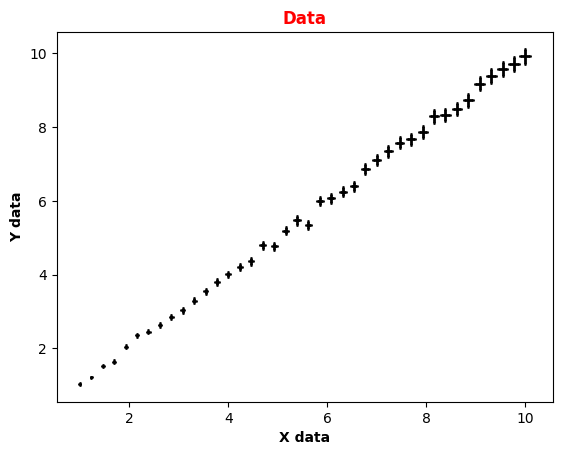

In [7]:
# Plotting data with errorbars (cross style user-made)
plt.errorbar(x, y, fmt = ".", xerr = sd_x, yerr = sd_y, barsabove = True, capsize = 1, capthick = 2, elinewidth = 2, markersize = 0, color = "black")
plt.title("Data", fontsize = 12, fontweight = "bold", color = "red")
plt.xlabel("X data", fontsize = 10, fontweight = "bold")
plt.ylabel("Y data", fontsize = 10, fontweight = "bold")

In [8]:
# Creating a RealData instance
data = RealData(x, y, sx = sd_x, sy = sd_y)

In [9]:
# Creating an ODR instance
initial_conditions = [m, q] # Intercept - Slope
odr = ODR(data, unilinear, beta0 = initial_conditions)

In [10]:
# Creating an Output instance
out = odr.run()

In [11]:
# All Output attributes
vars(out)

{'beta': array([0.995, 0.036]),
 'sd_beta': array([0.006, 0.019]),
 'cov_beta': array([[ 0., -0.],
        [-0.,  0.]]),
 'delta': array([ 0.   , -0.009,  0.007, -0.016,  0.017,  0.03 ,  0.01 , -0.002,
        -0.004, -0.013, -0.007, -0.001,  0.002, -0.002, -0.005, -0.024,
         0.019, -0.036,  0.007,  0.015, -0.057,  0.028, -0.002, -0.011,
        -0.03 ,  0.018,  0.021,  0.023,  0.023, -0.003, -0.009,  0.028,
        -0.01 , -0.023, -0.022,  0.023,  0.018,  0.009, -0.009, -0.012]),
 'eps': array([-0.001,  0.037, -0.033,  0.06 , -0.078, -0.144, -0.042,  0.008,
         0.017,  0.05 ,  0.028,  0.006, -0.009,  0.007,  0.022,  0.093,
        -0.08 ,  0.134, -0.027, -0.062,  0.207, -0.118,  0.007,  0.044,
         0.116, -0.076, -0.086, -0.095, -0.096,  0.013,  0.036, -0.116,
         0.039,  0.092,  0.085, -0.093, -0.074, -0.036,  0.036,  0.049]),
 'xplus': array([1.   , 1.221, 1.469, 1.676, 1.94 , 2.184, 2.394, 2.614, 2.842,
        3.064, 3.301, 3.537, 3.771, 3.998, 4.225, 4.437, 4.

Output contains everything there's to know about the performed fit.

In [12]:
# Sum of squared x residuals
sum_square_delta =  np.sum(out.delta ** 2 / (sd_x ** 2))
sum_square_delta

np.float64(8.220394691987092)

In [13]:
# Sum of squared y residuals
sum_square_eps = np.sum(out.eps ** 2 / (sd_y ** 2))
sum_square_eps

np.float64(34.54722156482029)

In [14]:
# Sum of squared residuals
sum_square = sum_square_delta + sum_square_eps
sum_square

np.float64(42.767616256807386)

In [15]:
# Reduced Chi-squared
res_var = sum_square / (N - 2)
res_var

np.float64(1.1254635857054576)

In [16]:
# Pretty-printing: only most important info
out.pprint()

Beta: [0.995 0.036]
Beta Std Error: [0.006 0.019]
Beta Covariance: [[ 0. -0.]
 [-0.  0.]]
Residual Variance: 1.1254635857054573
Inverse Condition #: 0.020075737426971
Reason(s) for Halting:
  Sum of squares convergence


In [17]:
# Extracting the best-fit parameters
m = vars(out)["beta"][0]
q = vars(out)["beta"][1]

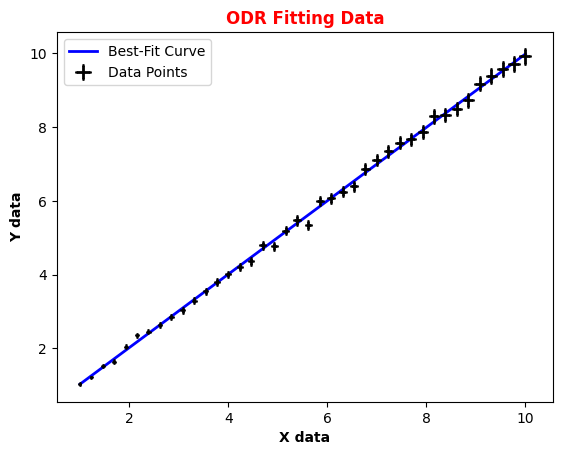

In [18]:
# Plotting the best-fit curve
plt.plot(x, m * x + q, color = "blue", linewidth = 2, label = "Best-Fit Curve")
plt.errorbar(x, y, fmt = ".", xerr = sd_x, yerr = sd_y, barsabove = True, capsize = 1, capthick = 2, elinewidth = 2, markersize = 0, color = "black", label = "Data Points")
plt.title("ODR Fitting Data", fontsize = 12, fontweight = "bold", color = "red")
plt.xlabel("X data", fontsize = 10, fontweight = "bold")
plt.ylabel("Y data", fontsize = 10, fontweight = "bold")
plt.legend(loc = "upper left")